In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

## import the library below:

In [2]:
from PyEyeSim import EyeData


In [3]:
%load_ext autoreload
%autoreload 2

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [4]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [5]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

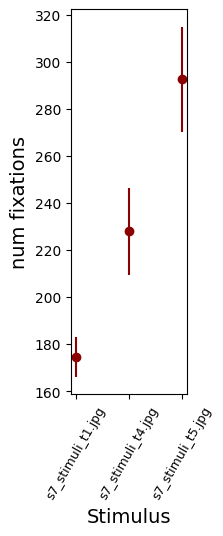

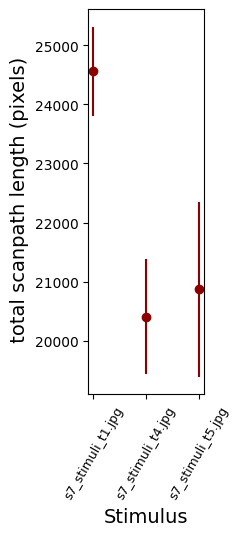

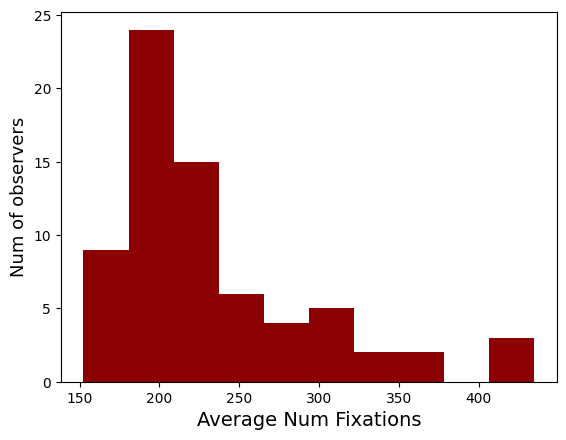

In [6]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

We can try to perform a t-test on the data to see if there is a significant difference between the two groups.

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [7]:
CondIdx, Cond = DyslexiaDat.GetGroups('class_id')

Conditions [0 1]


In [8]:
group_name = ['Non-Dyslexic','Dyslexic']

In [ ]:
# Perform a t-test on the len_scanpath for the two groups
def t_test_lenscanpath(self, Cond):
    for i,stim in enumerate(self.stimuli):
        groups = np.unique(Cond)
        group_len = []
        for group in groups:
            group_subj = np.where(Cond == group)[0]
            lenscanpath = []
            for subj in group_subj:
                lenscanpath.append(self.len_scanpath[subj][i])
            group_len.append(lenscanpath)
        t_stat, p_val = stats.ttest_ind(group_len[1], group_len[0])
        print('T-test for stimulus',stim,': t =',t_stat,'p =',p_val)

t_test_lenscanpath(DyslexiaDat, Cond)

T-test for stimulus s7_stimuli_t1.jpg : t = 3.73246879693332 p = 0.00038947671996635187
T-test for stimulus s7_stimuli_t4.jpg : t = 4.7827342997431685 p = 9.661717178145958e-06
T-test for stimulus s7_stimuli_t5.jpg : t = 3.313264994402906 p = 0.0014801733264936086


In [32]:
# Perform a t-test on the angle for the two groups
def t_test_angle(self, Cond):
    Saccades = self.saccadeangles
    for i,stim in enumerate(self.stimuli):
        groups = np.unique(Cond)
        group_saccades = []
        for group in groups:
            # from Saccades[subject, :,:] get only the subjects that are in the group
            group_saccades.append(Saccades[Cond==group,i])

        group_saccades = np.array(group_saccades)
        group_angles = []
        for group in group_saccades:
            angles = []
            for subj in group:
                for val in subj:
                    angles.append(val)
            group_angles.append(angles)
        # perform a t-test on the angles
        t, p = stats.ttest_ind(group_angles[1], group_angles[0])
        print(f"t-test for {stim}: t = {t}, p = {p}")

t_test_angle(DyslexiaDat, Cond)

t-test for s7_stimuli_t1.jpg: t = 0.43040065123498616, p = 0.6669118538465635
t-test for s7_stimuli_t4.jpg: t = 2.0260844564599516, p = 0.04277280226354608
t-test for s7_stimuli_t5.jpg: t = 1.2190324421177774, p = 0.2228459651137185


In [359]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=9,InferS=False)

In [360]:
t_test_angle(DyslexiaDat, Saccades, Cond)

t-test for s7_stimuli_t1.jpg: t = 0.39856502701759416, p = 0.6902201711388225
t-test for s7_stimuli_t4.jpg: t = 3.8435160465429026, p = 0.00012180699374276133
t-test for s7_stimuli_t5.jpg: t = 5.645950397508641, p = 1.668024545799186e-08


The t-test shows that the length scanpath and the angle scanpath of the two groups are significantly different.


In all the tests, on the stimulus t4(real world) and t5(pseudo world), the p-value is extremely low, which means that the null hypothesis can be rejected.

---

In [345]:
def Fixation_thr(self, FixData, group_name):
    # Calculate the number of fixation per subject of each group
    for i,stim in enumerate(self.stimuli):
        groups = np.unique(Cond)
        for group in groups:
            tot_count = []
            fix = FixData[(FixData['stimfile']==stim) & (FixData['class_id']==group)]
            fix = fix[['sid','orig_fix_x','orig_fix_y']]
            for subject in np.unique(fix['sid']):
                sub_fix = fix[fix['sid']==subject]
                count = len(sub_fix)
                tot_count.append(count)
            print('Number of fixations for group',group_name[group],'in stimulus',stim,':',np.mean(tot_count), '+/-',np.std(tot_count))

Fixation_thr(DyslexiaDat, FixData, group_name)

Number of fixations for group Non-Dyslexic in stimulus s7_stimuli_t1.jpg : 154.57142857142858 +/- 19.35869788166212
Number of fixations for group Dyslexic in stimulus s7_stimuli_t1.jpg : 194.71428571428572 +/- 36.02663413846676
Number of fixations for group Non-Dyslexic in stimulus s7_stimuli_t4.jpg : 179.85714285714286 +/- 24.803390156696448
Number of fixations for group Dyslexic in stimulus s7_stimuli_t4.jpg : 276.25714285714287 +/- 81.17013625963777
Number of fixations for group Non-Dyslexic in stimulus s7_stimuli_t5.jpg : 238.54285714285714 +/- 28.288657855495835
Number of fixations for group Dyslexic in stimulus s7_stimuli_t5.jpg : 346.77142857142854 +/- 102.76160642526975


In [ ]:
def Classify_by_Fixation(self, FixData, Cond):
    # Calculate the number of fixation per subject of each group
    for i,stim in enumerate(self.stimuli):
        groups = np.unique(Cond)
        group_count = []
        for group in groups:
            tot_count = []
            fix = FixData[(FixData['stimfile']==stim) & (FixData['class_id']==group)]
            fix = fix[['sid','orig_fix_x','orig_fix_y']]
            for subject in np.unique(fix['sid']):
                sub_fix = fix[fix['sid']==subject]
                count = len(sub_fix)
                tot_count.append(count)
            group_count.append(tot_count)
        dyslexic = []        
        non_dyslexic = []
        false_positive = []
        false_negative = []
        c1 = 0
        c2 = 0
        for j in range(self.ns):
            g = Cond[j]
            if g == 0:
                s = c1
                c1 += 1
            else:
                s = c2
                c2 += 1
            if g == 0 and (group_count[g][s] <= np.mean(group_count[g])+np.std(group_count[g]) or group_count[g][s] < np.mean(group_count[1])-np.std(group_count[1])):
                non_dyslexic.append(s)
            elif g == 0:
                false_positive.append(s)
            elif g == 1 and (group_count[g][s] >= np.mean(group_count[g])-np.std(group_count[g]) or group_count[g][s] > np.mean(group_count[0])+np.std(group_count[0])):
                dyslexic.append(s)
            elif g == 1:
                false_negative.append(s)
        print(f'Number of dyslexic subjects: {len(dyslexic)}, {len(dyslexic)/35*100}%')
        print(f'Number of non-dyslexic subjects: {len(non_dyslexic)}, {len(non_dyslexic)/35*100}%')
        print(f'Number of false positive: {len(false_positive)}')
        print(f'Number of false negative: {len(false_negative)}')

Classify_by_Fixation(DyslexiaDat, FixData, Cond)

Number of dyslexic subjects: 28, 80.0%
Number of non-dyslexic subjects: 30, 85.71428571428571%
Number of false positive: 5
Number of false negative: 7
Number of dyslexic subjects: 29, 82.85714285714286%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 6
Number of dyslexic subjects: 29, 82.85714285714286%
Number of non-dyslexic subjects: 27, 77.14285714285715%
Number of false positive: 8
Number of false negative: 6


In [ ]:
def Fixation_entropy(self, FixData, group_name):
    # Calculate the entropy of fixation distribution and duration for each stimulus and split by group
    for i,stim in enumerate(self.stimuli):
        groups = np.unique(Cond)
        for group in groups:
            tot_entropy = []
            fix = FixData[(FixData['stimfile']==stim) & (FixData['class_id']==group)]
            fix = fix[['sid','orig_fix_x','orig_fix_y','duration_ms']]
            # remove negative values
            fix = fix[(fix['orig_fix_x'] > 0) & (fix['orig_fix_y'] > 0) & (fix['duration_ms'] > 0)]
            # for every subject in the group calculate the entropy of the fixation distribution
            for subject in np.unique(fix['sid']):
                fix_subj = fix[fix['sid']==subject]
                # calculate the entropy of the fixation distribution
                entropy_x = stats.entropy(fix_subj['orig_fix_x'].values)
                entropy_y = stats.entropy(fix_subj['orig_fix_y'].values)
                # calculate the entropy of the fixation duration
                entropy_dur = stats.entropy(fix_subj['duration_ms'].values)
                # calculate the total entropy
                tot_entropy.append((entropy_x + entropy_y + entropy_dur)/3)
            print(f'Entropy for {group_name[group]} stimulus {stim}: {np.mean(tot_entropy)} +/- {np.std(tot_entropy)}')

In [ ]:
Fixation_entropy(DyslexiaDat, FixData, group_name)

Entropy for 0 stimulus s7_stimuli_t1.jpg: 4.898874770675988 +/- 0.11634818333800767
Entropy for 1 stimulus s7_stimuli_t1.jpg: 5.084861363720063 +/- 0.16123102640984063
Entropy for 0 stimulus s7_stimuli_t4.jpg: 5.063536557835967 +/- 0.13570418612173882
Entropy for 1 stimulus s7_stimuli_t4.jpg: 5.436071860601108 +/- 0.2481288548184546
Entropy for 0 stimulus s7_stimuli_t5.jpg: 5.326964331208191 +/- 0.11749414758438236
Entropy for 1 stimulus s7_stimuli_t5.jpg: 5.645080613243404 +/- 0.2628400153021476


In [264]:
def classify_subjects_by_entropy(self, FixData, Cond):
    # Calculate the entropy of fixation distribution and duration for each stimulus and split by group
    for stim in self.stimuli:
        groups = np.unique(Cond)
        group_entropy = []
        for group in groups:
            tot_entropy = []
            fix = FixData[(FixData['stimfile']==stim) & (FixData['class_id']==group)]
            fix = fix[['sid','orig_fix_x','orig_fix_y','duration_ms']]
            # remove negative values
            fix = fix[(fix['orig_fix_x'] > 0) & (fix['orig_fix_y'] > 0) & (fix['duration_ms'] > 0)]
            # for every subject in the group calculate the entropy of the fixation distribution
            for subject in np.unique(fix['sid']):
                fix_subj = fix[fix['sid']==subject]
                # calculate the entropy of the fixation distribution
                entropy_x = stats.entropy(fix_subj['orig_fix_x'].values)
                entropy_y = stats.entropy(fix_subj['orig_fix_y'].values)
                # calculate the entropy of the fixation duration
                entropy_dur = stats.entropy(fix_subj['duration_ms'].values)
                # calculate the total entropy
                tot_entropy.append((entropy_x + entropy_y + entropy_dur)/3)
            group_entropy.append(tot_entropy)
        # classify subjects by entropy
        dyslexic = []
        non_dyslexic = []
        false_positive = []
        false_negative = []
        c1 = 0
        c2 = 0
        for j in range(self.ns):
            g = Cond[j]
            if g == 0:
                s = c1
                c1 += 1
            else:
                s = c2
                c2 += 1
            if g == 0 and (group_entropy[g][s] <= np.mean(group_entropy[g])+np.std(group_entropy[g]) or group_entropy[g][s] < np.mean(group_entropy[1])-np.std(group_entropy[1])):
                non_dyslexic.append(s)
            elif g == 0:
                false_positive.append(s)
            elif g == 1 and (group_entropy[g][s] >= np.mean(group_entropy[g])-np.std(group_entropy[g]) or group_entropy[g][s] > np.mean(group_entropy[0])+np.std(group_entropy[0])):
                dyslexic.append(s)
            elif g == 1:
                false_negative.append(s)
        print(f'Number of dyslexic subjects: {len(dyslexic)}, {len(dyslexic)/35*100}%')
        print(f'Number of non-dyslexic subjects: {len(non_dyslexic)}, {len(non_dyslexic)/35*100}%')
        print(f'Number of false positive: {len(false_positive)}')
        print(f'Number of false negative: {len(false_negative)}')

In [ ]:
classify_subjects_by_entropy(DyslexiaDat, FixData, group_name)

Number of dyslexic subjects: 28, 80.0%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 7
Number of dyslexic subjects: 31, 88.57142857142857%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 4
Number of dyslexic subjects: 30, 85.71428571428571%
Number of non-dyslexic subjects: 27, 77.14285714285715%
Number of false positive: 8
Number of false negative: 5


In [35]:
def plot_angle(self, group_name):
    Saccades = self.saccadeangles
    for i,stim in enumerate(self.stimuli):
        # for every group of subjects show an istogram with the distribution of the saccades angles
        groups = np.unique(Cond)
        group_saccades = []
        for group in groups:
            # from Saccades[subject, :,:] get only the subjects that are in the group
            group_saccades.append(Saccades[Cond==group,i])

        group_saccades = np.array(group_saccades)
        fig, ax = plt.subplots(1, len(groups), figsize=(20, 5))
        fig.suptitle(f'Stimulus {stim}')

        for j, group in enumerate(group_saccades):
            angles = []
            entropy = []
            for subj in group:
                for val in subj:
                        angles.append(val)
                # calculate the entropy of the angles
                entropy.append(stats.entropy(np.histogram(angles, bins=360)[0]))
            print(f'Entropy of group {group_name[j]} for stimulus {stim}: {np.mean(entropy)} +/- {np.std(entropy)}')
            ax[j].hist(angles, bins=360)
            ax[j].set_title(f'Group {group_name[j]}')
            ax[j].set_xlabel('Angle')
            ax[j].set_ylabel('Frequency')
        plt.show()

Entropy of group Non-Dyslexic for stimulus s7_stimuli_t1.jpg: 4.232443868214381 +/- 0.14787772252190776
Entropy of group Dyslexic for stimulus s7_stimuli_t1.jpg: 4.437780746058067 +/- 0.18661063587548077


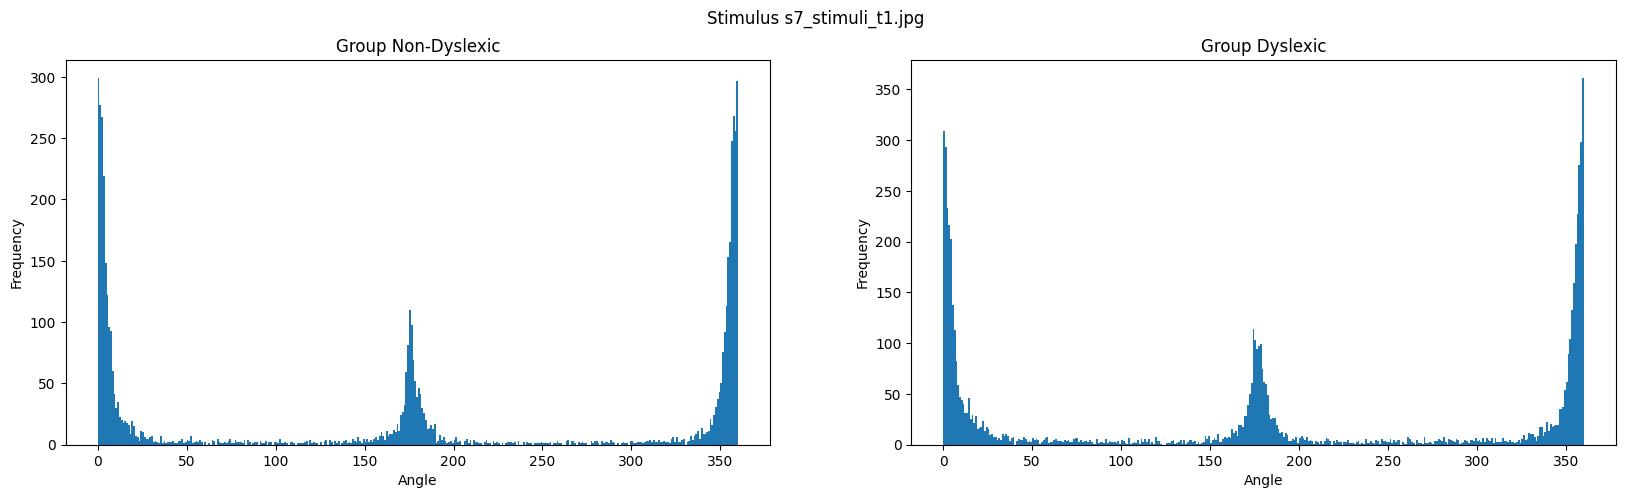

Entropy of group Non-Dyslexic for stimulus s7_stimuli_t4.jpg: 4.301383802506389 +/- 0.1279067636459099
Entropy of group Dyslexic for stimulus s7_stimuli_t4.jpg: 4.81711926429845 +/- 0.1858064477551685


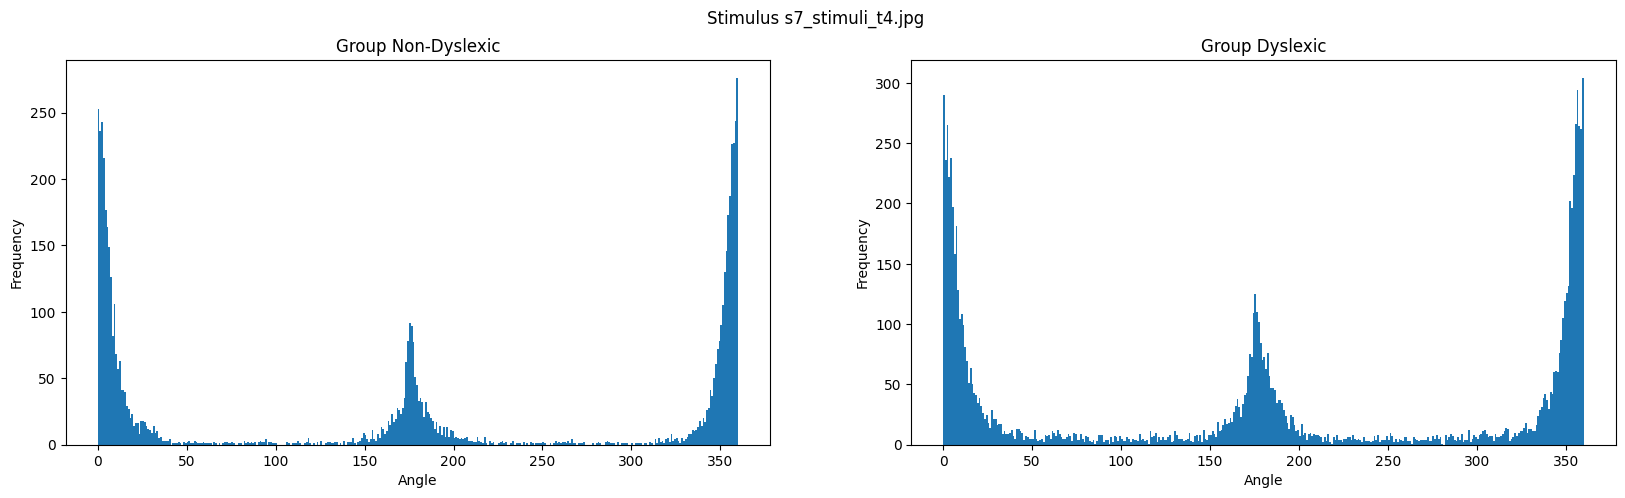

Entropy of group Non-Dyslexic for stimulus s7_stimuli_t5.jpg: 4.639141554476258 +/- 0.07830232281835234
Entropy of group Dyslexic for stimulus s7_stimuli_t5.jpg: 4.982559507623091 +/- 0.1992651811356657


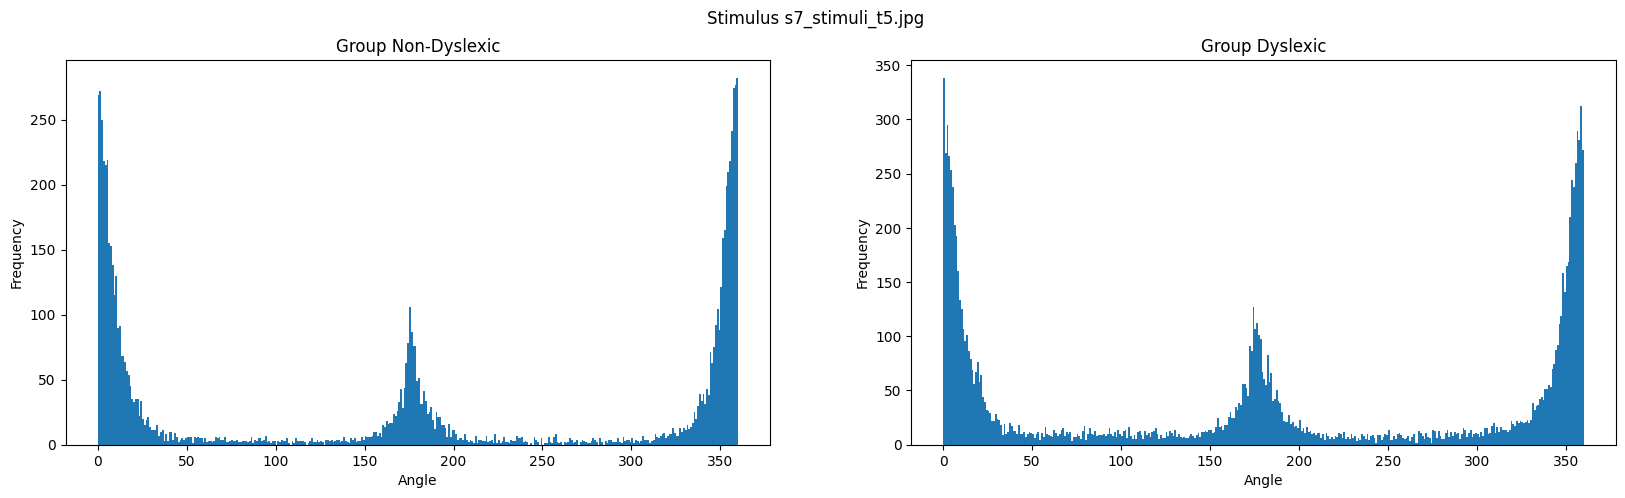

In [36]:
plot_angle(DyslexiaDat, group_name)

Entropy of group Non-Dyslexic for stimulus s7_stimuli_t1.jpg: 4.331109046901127 +/- 0.20070971358647358
Entropy of group Dyslexic for stimulus s7_stimuli_t1.jpg: 4.583127129480161 +/- 0.24821171303982562


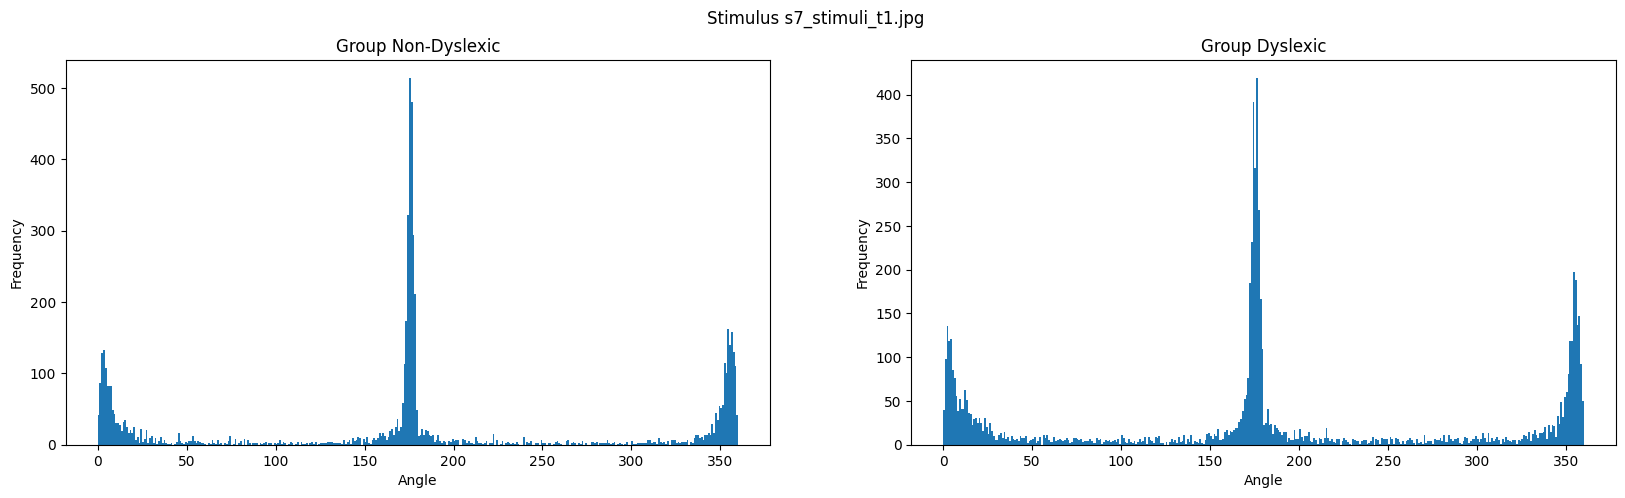

Entropy of group Non-Dyslexic for stimulus s7_stimuli_t4.jpg: 4.3931126733907035 +/- 0.2236822956019904
Entropy of group Dyslexic for stimulus s7_stimuli_t4.jpg: 5.008035052824111 +/- 0.29443282788307706


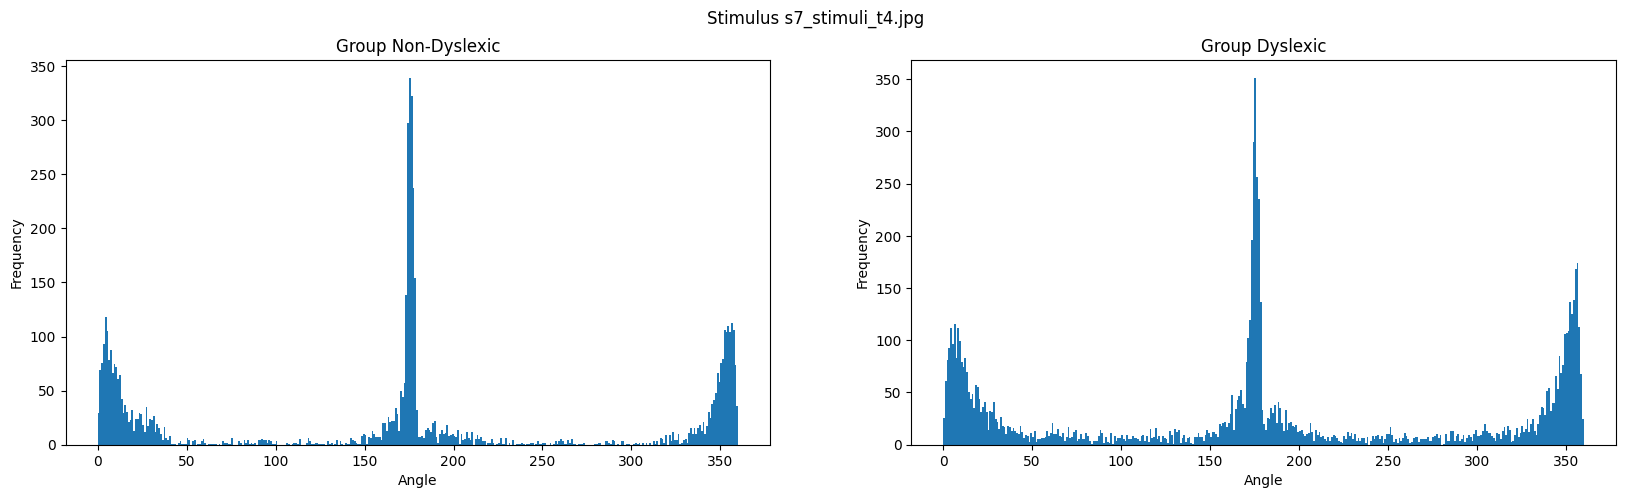

Entropy of group Non-Dyslexic for stimulus s7_stimuli_t5.jpg: 4.778342397996406 +/- 0.14347020802311455
Entropy of group Dyslexic for stimulus s7_stimuli_t5.jpg: 5.193877287605286 +/- 0.28416039711515423


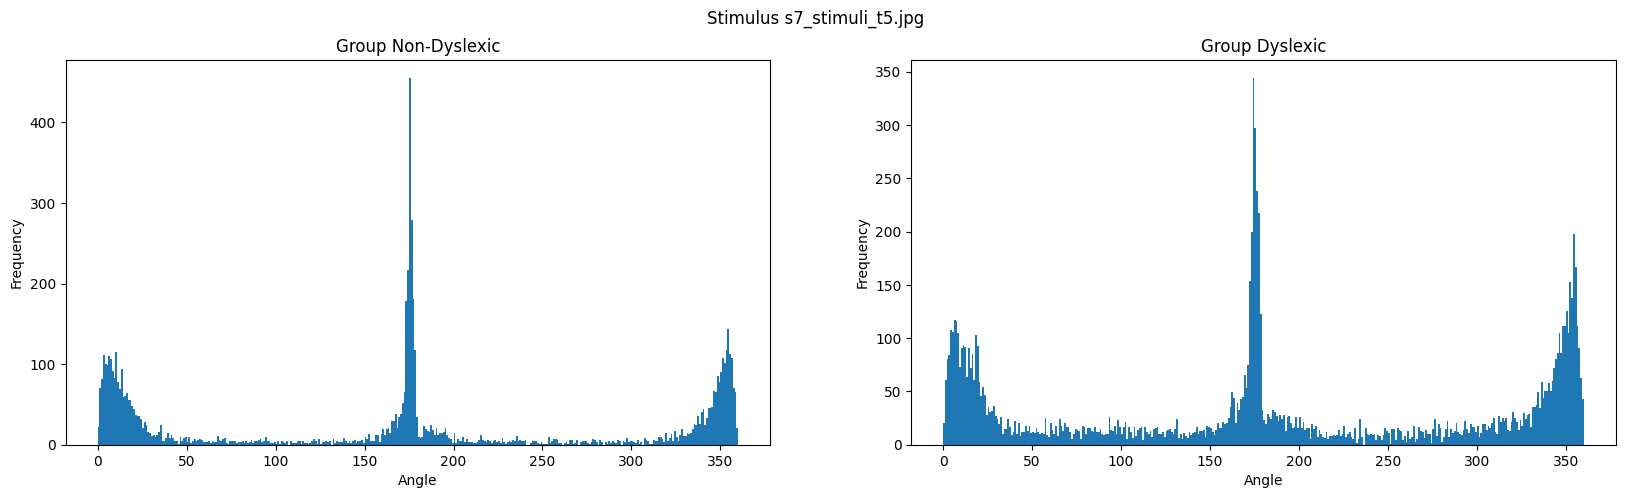

In [268]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=9,InferS=False)
group_name = ['Non-Dyslexic', 'Dyslexic']
plot_angle(DyslexiaDat, Saccades, group_name)

In [269]:
# try to make a classifier based only on a threshold on the entropy of the angles
def classify_subjects_by_Saccades_entropy(self, Saccades, Cond):
    for i,stim in enumerate(self.stimuli):
        # for every group of subjects show an istogram with the distribution of the saccades angles
        groups = np.unique(Cond)
        group_saccades = []
        for group in groups:
            # from Saccades[subject, :,:] get only the subjects that are in the group
            group_saccades.append(Saccades[Cond==group,i,:,:])

        group_saccades = np.array(group_saccades)
        group_entropy = []
        for j, group in enumerate(group_saccades):
            angles = []
            entropy = []
            for subj in group:
                for h in range(subj.shape[0]):
                    for v in range(subj.shape[1]):
                        for val in subj[h,v]:
                            angles.append(val)
                # calculate the entropy of the angles
                entropy.append(stats.entropy(np.histogram(angles, bins=360)[0]))
            group_entropy.append(entropy)
        # classify the subjects based on the entropy of the angles
        dyslexic = []
        non_dyslexic = []
        false_positive = []
        false_negative = []
        c1 = 0
        c2 = 0
        for j in range(self.ns):
            g = Cond[j]
            if g == 0:
                s = c1
                c1 += 1
            else:
                s = c2
                c2 += 1
            if g == 0 and (group_entropy[g][s] <= np.mean(group_entropy[g])+np.std(group_entropy[g]) or group_entropy[g][s] < np.mean(group_entropy[1])-np.std(group_entropy[1])):
                non_dyslexic.append(s)
            elif g == 0:
                false_positive.append(s)
            elif g == 1 and (group_entropy[g][s] >= np.mean(group_entropy[g])-np.std(group_entropy[g]) or group_entropy[g][s] > np.mean(group_entropy[0])+np.std(group_entropy[0])):
                dyslexic.append(s)
            elif g == 1:
                false_negative.append(s)
        print(f'Number of dyslexic subjects: {len(dyslexic)}, {len(dyslexic)/35*100}%')
        print(f'Number of non-dyslexic subjects: {len(non_dyslexic)}, {len(non_dyslexic)/35*100}%')
        print(f'Number of false positive: {len(false_positive)}')
        print(f'Number of false negative: {len(false_negative)}')


In [270]:
classify_subjects_by_Saccades_entropy(DyslexiaDat, Saccades, Cond)

Number of dyslexic subjects: 29, 82.85714285714286%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 6
Number of dyslexic subjects: 33, 94.28571428571428%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 2
Number of dyslexic subjects: 32, 91.42857142857143%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 3


From a first analysis we can see how the two groups significantly differ under multiple aspects:

- Total number of fixations
- Fixation coordinates
- Fixation duration
- Angle distribution

With a more fine graning (more roi subdivisions) we can notice that the this difference in the angle is even more pronounced.

First we can see that the two groups have a different number of fixations and using only this feature we can achieve already a 0.83 accuracy in the classification of Dyslexic subjects.

Then using only the entropy of the angle distribution we can improve the results by achieve a 0.88 accuracy in the classification of Dyslexic subjects using x,y and duration of fixations and 0.94 using only the angle entropy.

This enforce the idea that the two groups has many key differences in the way they scan the stimuli.

---

We can also try to filter the fixation to have at maximum n fixations per subject and stimulus, this can be useful to have a more balanced dataset.

We can consider as maximum fixation the slowest non-dyslexic subject.

Now we will try to perform the same analysis using less fixations in order to understand if the same differences are still present.

In [271]:
# For each stimfile and for each sid find the subject of the group 0 with the most fixations
list_task = FixData['stimfile'].unique()
Data = FixData[FixData['class_id'] == 0] 
Tasks = Data.groupby(['stimfile','sid']).size().reset_index(name='counts')
list_max = {}
for task in list_task:
    Task = Tasks[Tasks['stimfile'] == task]
    Task = Task.sort_values(by='counts', ascending=False)
    list_max[task] = Task.head(1)['counts'].values[0]
    print(Task.head(1))
    print('')

             stimfile   sid  counts
22  s7_stimuli_t1.jpg  1257     202

             stimfile   sid  counts
65  s7_stimuli_t4.jpg  1322     225

             stimfile   sid  counts
71  s7_stimuli_t5.jpg  1016     286



In [272]:
# Filter FixData to keep at maximum list_max fixations for each task for every subject
filtered_data = pd.DataFrame()

for task in list_max.keys():
    task_max_fixations = list_max[task]
    task_data = FixData[FixData['stimfile'] == task]
    task_filtered_data = pd.DataFrame()
    for sid in task_data['sid'].unique():
        sid_data = task_data[task_data['sid'] == sid]
        sid_data = sid_data.head(task_max_fixations)
        task_filtered_data = pd.concat([task_filtered_data, sid_data])
    filtered_data = pd.concat([filtered_data, task_filtered_data])

filtered_data = filtered_data.reset_index(drop=True)
FixData = filtered_data

dataset size:  (43654, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  207.88  +/-  2

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

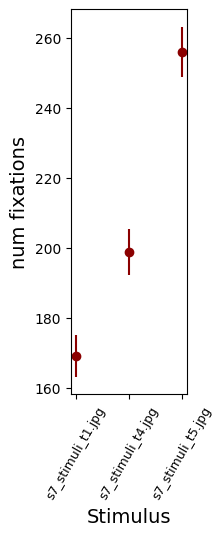

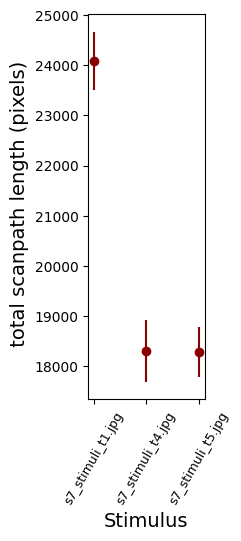

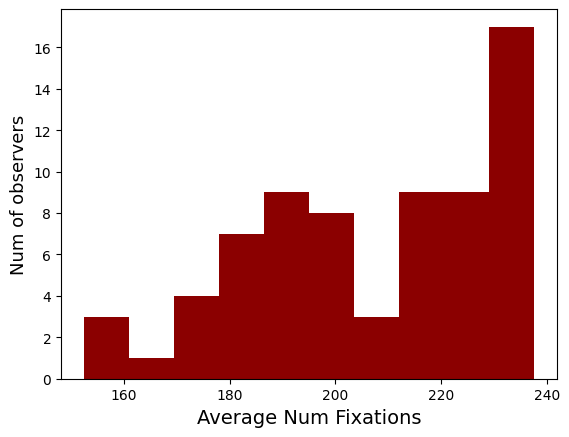

In [273]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='orig_fix_x',mean_y='orig_fix_y',FixDuration='duration_ms',Stimulus='stimfile',subjectID='sid', StimPath=Path+'images/',StimExt='.jpg')
DyslexiaDat.RunDescriptiveFix(Visual=1)


In [274]:
CondIdx, Cond = DyslexiaDat.GetGroups('class_id')

Conditions [0 1]


In [286]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1,InferS=False)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


In [290]:
Fixation_entropy(DyslexiaDat, FixData, group_name)

Entropy for Non-Dyslexic stimulus s7_stimuli_t1.jpg: 4.898874770675988 +/- 0.11634818333800767
Entropy for Dyslexic stimulus s7_stimuli_t1.jpg: 5.036957103206334 +/- 0.10267896509204594
Entropy for Non-Dyslexic stimulus s7_stimuli_t4.jpg: 5.063536557835967 +/- 0.13570418612173882
Entropy for Dyslexic stimulus s7_stimuli_t4.jpg: 5.235813100171958 +/- 0.05022227378037963
Entropy for Non-Dyslexic stimulus s7_stimuli_t5.jpg: 5.326964331208191 +/- 0.11749414758438236
Entropy for Dyslexic stimulus s7_stimuli_t5.jpg: 5.448096379116148 +/- 0.07069721515988471


In [276]:
# try to make a classifier based only on a threshold on the entropy of the fixation number
classify_subjects_by_entropy(DyslexiaDat, FixData, Cond)

Number of dyslexic subjects: 28, 80.0%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 7
Number of dyslexic subjects: 31, 88.57142857142857%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 4
Number of dyslexic subjects: 30, 85.71428571428571%
Number of non-dyslexic subjects: 27, 77.14285714285715%
Number of false positive: 8
Number of false negative: 5


Entropy of group Non-Dyslexic for stimulus s7_stimuli_t1.jpg: 4.708851239694732 +/- 0.250173309133804
Entropy of group Dyslexic for stimulus s7_stimuli_t1.jpg: 4.911472265652004 +/- 0.28952959428962377


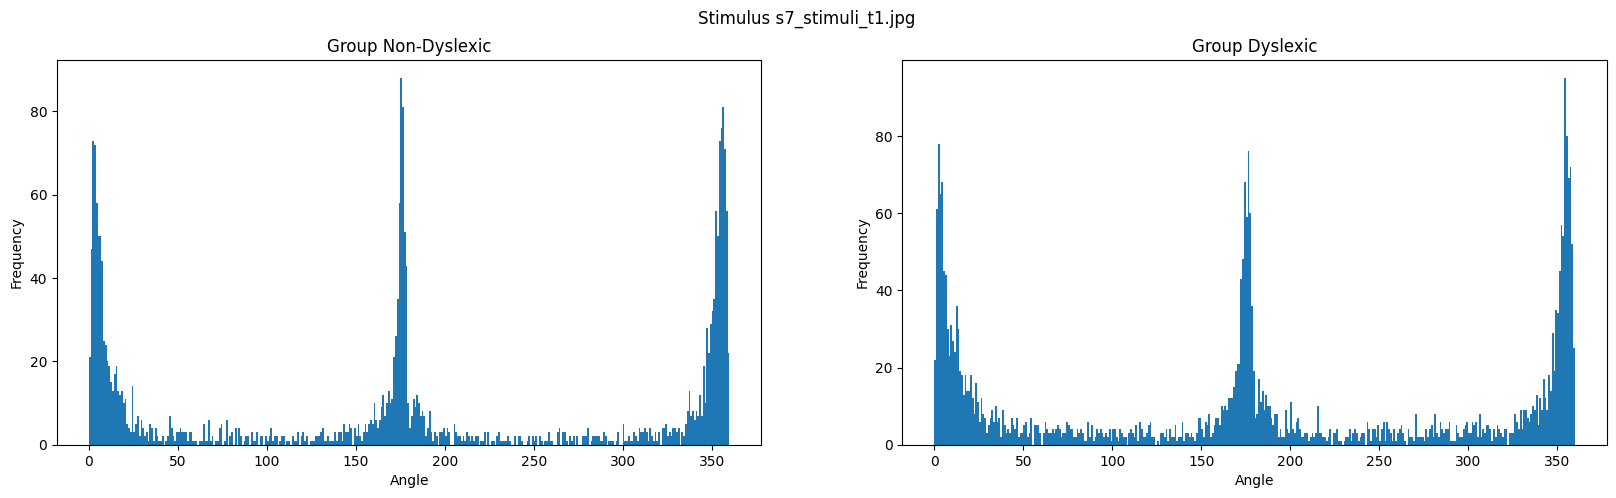

Entropy of group Non-Dyslexic for stimulus s7_stimuli_t4.jpg: 4.648328227835034 +/- 0.23428950335169574
Entropy of group Dyslexic for stimulus s7_stimuli_t4.jpg: 5.121354897576303 +/- 0.2699649164490253


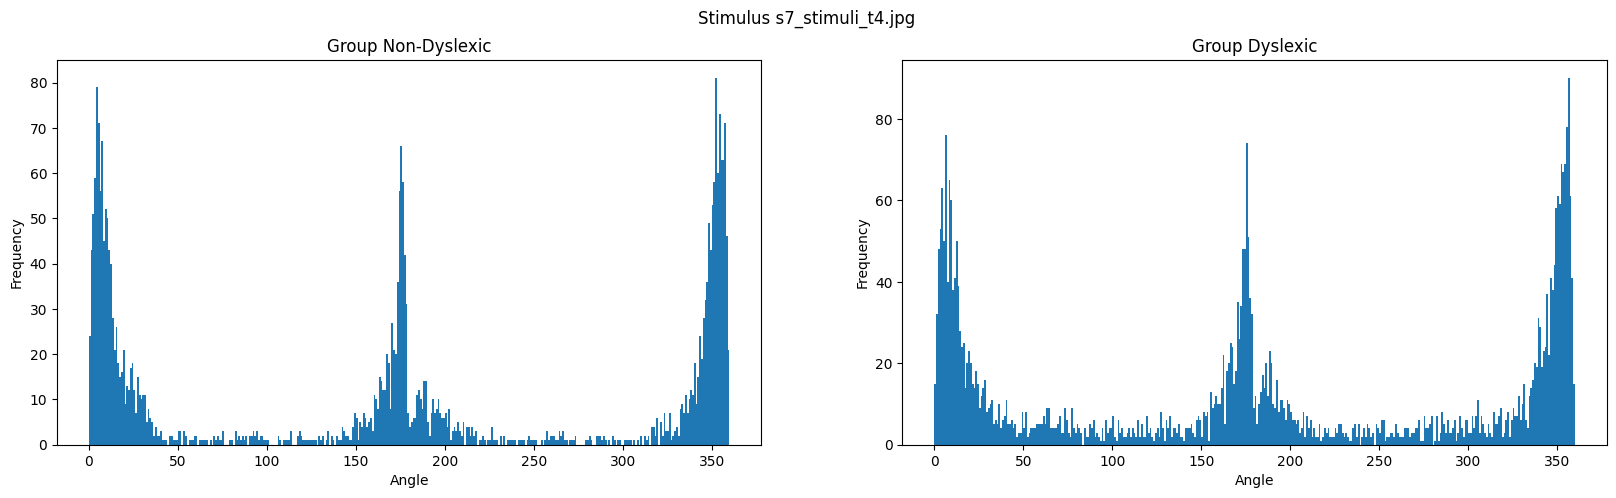

Entropy of group Non-Dyslexic for stimulus s7_stimuli_t5.jpg: 5.023008680739336 +/- 0.15680461169973567
Entropy of group Dyslexic for stimulus s7_stimuli_t5.jpg: 5.2761812094462 +/- 0.2750470630727281


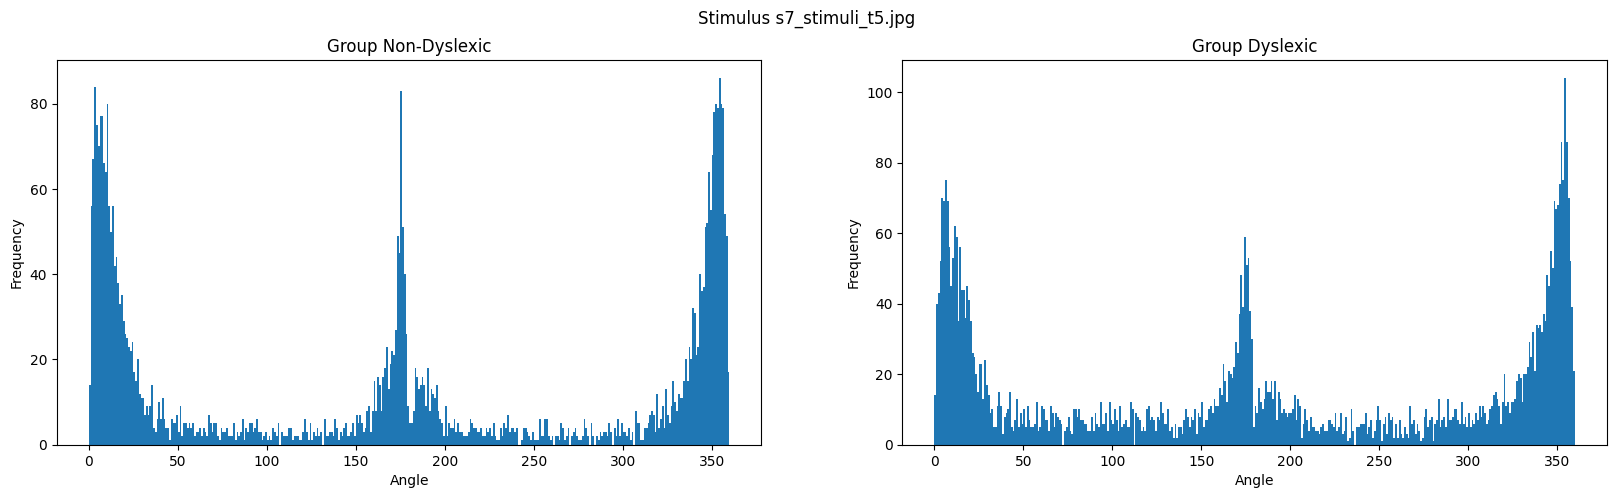

In [277]:
group_name = ['Non-Dyslexic', 'Dyslexic']
plot_angle(DyslexiaDat, Saccades, group_name)

In [254]:
classify_subjects_by_Saccades_entropy(DyslexiaDat, Saccades, Cond)

Number of dyslexic subjects: 29, 82.85714285714286%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 6
Number of dyslexic subjects: 31, 88.57142857142857%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 4
Number of dyslexic subjects: 32, 91.42857142857143%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 3


In [284]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=9,InferS=False)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


In [285]:
classify_subjects_by_entropy(DyslexiaDat, FixData, Cond)
print('')
classify_subjects_by_Saccades_entropy(DyslexiaDat, Saccades, Cond)

Number of dyslexic subjects: 28, 80.0%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 7
Number of dyslexic subjects: 31, 88.57142857142857%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 4
Number of dyslexic subjects: 30, 85.71428571428571%
Number of non-dyslexic subjects: 27, 77.14285714285715%
Number of false positive: 8
Number of false negative: 5

Number of dyslexic subjects: 30, 85.71428571428571%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 5
Number of dyslexic subjects: 32, 91.42857142857143%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 3
Number of dyslexic subjects: 32, 91.42857142857143%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 3


In [282]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=14,InferS=False)

In [283]:
classify_subjects_by_entropy(DyslexiaDat, FixData, Cond)
print('')
classify_subjects_by_Saccades_entropy(DyslexiaDat, Saccades, Cond)

Number of dyslexic subjects: 28, 80.0%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 7
Number of dyslexic subjects: 31, 88.57142857142857%
Number of non-dyslexic subjects: 29, 82.85714285714286%
Number of false positive: 6
Number of false negative: 4
Number of dyslexic subjects: 30, 85.71428571428571%
Number of non-dyslexic subjects: 27, 77.14285714285715%
Number of false positive: 8
Number of false negative: 5

Number of dyslexic subjects: 31, 88.57142857142857%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 4
Number of dyslexic subjects: 32, 91.42857142857143%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 3
Number of dyslexic subjects: 32, 91.42857142857143%
Number of non-dyslexic subjects: 35, 100.0%
Number of false positive: 0
Number of false negative: 3


- After a certain number of subdivision we can see that the accuracy of the classification is not improving anymore.
- The accuracy of the classification is higher using the angle entropy than using the number of fixations, this means that the angle distribution is more important than the number of fixations.


---

resolution x = 1680  y = 1050
dimensions= (70, 1050, 1680)
reduced dims (70, 132, 210)
Conditions [0 1]
num observers in group 1: 35
num observers in group 2: 35
100 permutations starting


73.57810152760798

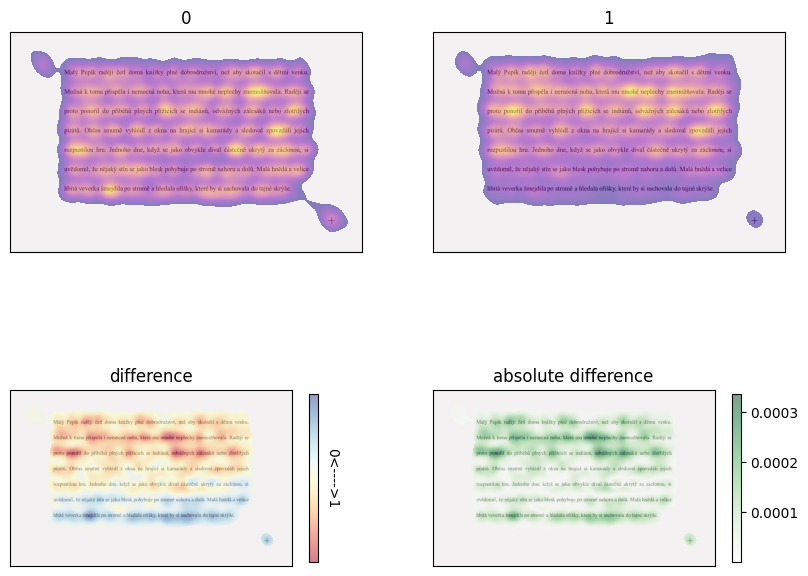

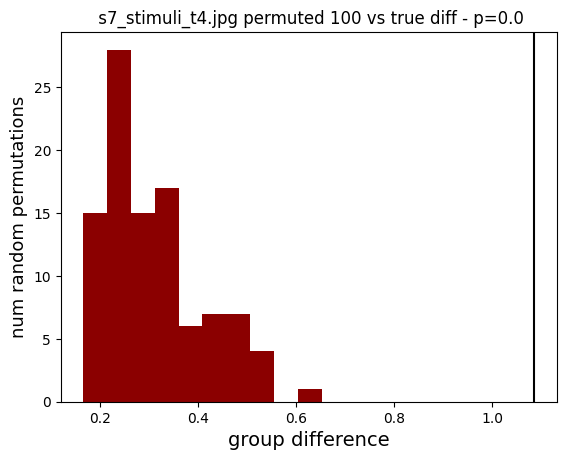

In [319]:
DyslexiaDat.CompareGroupsHeatmap(DyslexiaDat.stimuli[1],'class_id')

resolution x = 1680  y = 1050
dimensions= (70, 1050, 1680)
reduced dims (70, 132, 210)
Conditions [0 1]
num observers in group 1: 35
num observers in group 2: 35
100 permutations starting


86.61383496529854

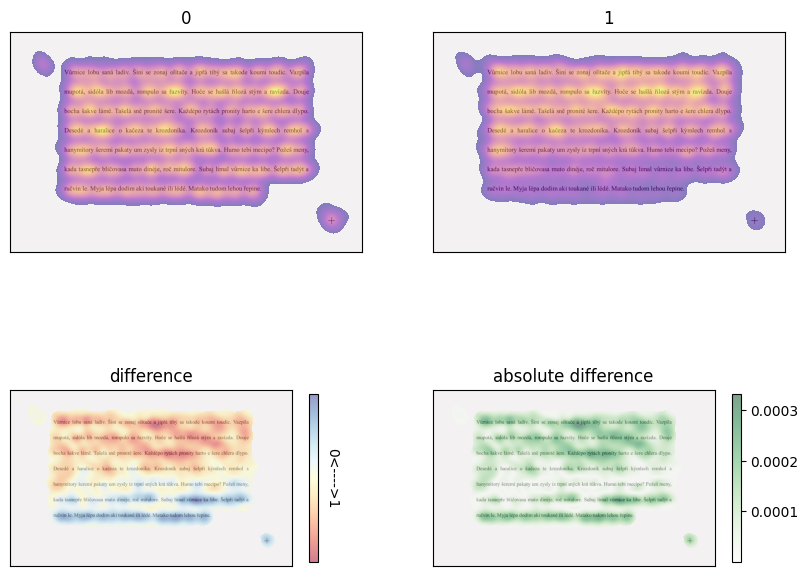

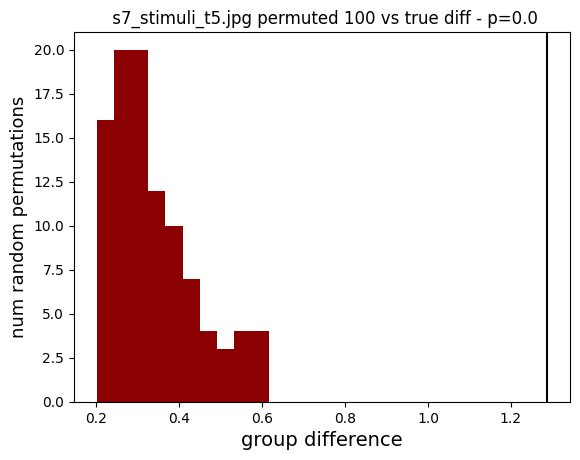

In [320]:
DyslexiaDat.CompareGroupsHeatmap(DyslexiaDat.stimuli[2],'class_id')

We can notice how only few Dyslexic subject can actually reach the end of the text.

In [314]:
# Analyze the total covariance of the fixations 
def classify_covariance_fixations(self, FixData, Cond):
    for i,stim in enumerate(self.stimuli):
        groups = np.unique(Cond)
        group_det = []
        for group in groups:
            fix = FixData[(FixData['stimfile']==stim) & (FixData['class_id']==group)]
            fix = fix[['sid','orig_fix_x','orig_fix_y']]
            # remove negative values
            fix = fix[(fix['orig_fix_x'] > 0) & (fix['orig_fix_y'] > 0)]
            subj_det = []
            for subject in np.unique(fix['sid']):
                fix_subj = fix[fix['sid']==subject]
                # calculate the covariance matrix of the fixations
                cov = np.cov(fix_subj['orig_fix_x'].values, fix_subj['orig_fix_y'].values)
                det = np.linalg.det(cov)
                subj_det.append(det)
            group_det.append(subj_det)
            print(f'Covariance matrix for {group_name[group]} stimulus {stim}: {np.mean(subj_det)}')
        # classify the subjects based on the determinant of the covariance matrix
        dyslexic = []
        non_dyslexic = []
        false_positive = []
        false_negative = []
        c1 = 0
        c2 = 0
        for j in range(self.ns):
            g = Cond[j]
            if g == 0:
                s = c1
                c1 += 1
            else:
                s = c2
                c2 += 1
            if g == 0 and (group_det[g][s] >= np.mean(group_det[g]) or group_det[g][s] > np.mean(group_det[1])):
                non_dyslexic.append(s)
            elif g == 0:
                false_positive.append(s)
            elif g == 1 and (group_det[g][s] <= np.mean(group_det[g]) or group_det[g][s] < np.mean(group_det[0])):
                dyslexic.append(s)
            elif g == 1:
                false_negative.append(s)
        print(f'Number of dyslexic subjects: {len(dyslexic)}, {len(dyslexic)/35*100}%')
        print(f'Number of non-dyslexic subjects: {len(non_dyslexic)}, {len(non_dyslexic)/35*100}%')
        print(f'Number of false positive: {len(false_positive)}')
        print(f'Number of false negative: {len(false_negative)}')


classify_covariance_fixations(DyslexiaDat, FixData, Cond)

Covariance matrix for Non-Dyslexic stimulus s7_stimuli_t1.jpg: 5654824812.404325
Covariance matrix for Dyslexic stimulus s7_stimuli_t1.jpg: 4920981516.910559
Number of dyslexic subjects: 30, 85.71428571428571%
Number of non-dyslexic subjects: 30, 85.71428571428571%
Number of false positive: 5
Number of false negative: 5
Covariance matrix for Non-Dyslexic stimulus s7_stimuli_t4.jpg: 4237186006.572217
Covariance matrix for Dyslexic stimulus s7_stimuli_t4.jpg: 2859069133.8621016
Number of dyslexic subjects: 30, 85.71428571428571%
Number of non-dyslexic subjects: 34, 97.14285714285714%
Number of false positive: 1
Number of false negative: 5
Covariance matrix for Non-Dyslexic stimulus s7_stimuli_t5.jpg: 4073005799.2208123
Covariance matrix for Dyslexic stimulus s7_stimuli_t5.jpg: 2907654912.3473344
Number of dyslexic subjects: 31, 88.57142857142857%
Number of non-dyslexic subjects: 34, 97.14285714285714%
Number of false positive: 1
Number of false negative: 4
